In [35]:
!kaggle datasets download -d fedesoriano/traffic-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/traffic-prediction-dataset
License(s): copyright-authors


In [36]:
!unzip traffic-prediction-dataset.zip

Archive:  traffic-prediction-dataset.zip
  inflating: traffic.csv             


In [87]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import tensorflow as tf  # Import TensorFlow
import matplotlib.pyplot as plt


# Load the dataset
file_path = '/content/Traffic.csv'
df = pd.read_csv(file_path)

In [90]:
# 1. Preprocess time and Traffic Situation columns
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p')

# Encode Traffic Situation to numeric values (for classification)
df['Traffic Situation'] = LabelEncoder().fit_transform(df['Traffic Situation'])
df['Traffic Situation'] = df['Traffic Situation'].replace({'Heavy': 1, 'High': 2, 'Normal': 3, 'Low': 4})

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6049 - loss: 1.0973 - val_accuracy: 0.7198 - val_loss: 0.6417
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7712 - loss: 0.5419 - val_accuracy: 0.8305 - val_loss: 0.4330
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8717 - loss: 0.3686 - val_accuracy: 0.9128 - val_loss: 0.3411
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9181 - loss: 0.2923 - val_accuracy: 0.9044 - val_loss: 0.2881
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9243 - loss: 0.2674 - val_accuracy: 0.9094 - val_loss: 0.2586
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9290 - loss: 0.2337 - val_accuracy: 0.9144 - val_loss: 0.2413
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9368 - loss: 0.2115 - val_accuracy: 0.9262 - val_loss: 0.2200
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9418 - loss: 0.1937 - val_accuracy: 0.9346 - val_loss: 0.2066
Epo

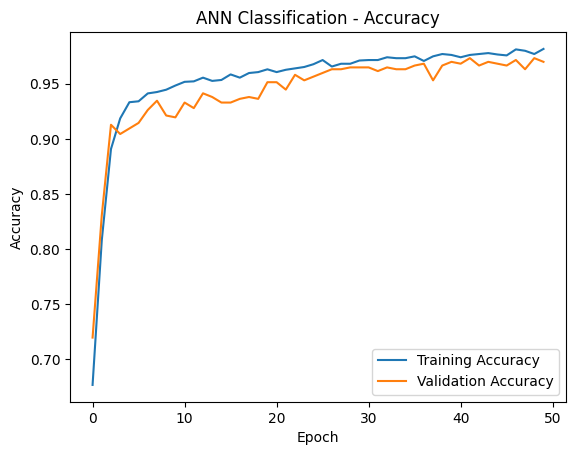

['scaler_classification.save']

In [91]:
# 2. Model ANN for Classification (Traffic Situation)
X_classification = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']]
y_classification = df['Traffic Situation']

# Normalize the features for classification using StandardScaler
scaler_class = StandardScaler()
X_classification = scaler_class.fit_transform(X_classification)

# Train-test split for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Create the ANN model for classification
model_class = Sequential()
model_class.add(Dense(64, input_dim=X_train_class.shape[1], activation='relu'))
model_class.add(Dense(32, activation='relu'))
model_class.add(Dense(4, activation='softmax'))  # Output layer with 4 categories: Heavy, High, Normal, Low

# Compile and fit the model for classification
model_class.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_class = model_class.fit(X_train_class, y_train_class, epochs=50, batch_size=32, validation_data=(X_test_class, y_test_class))

# Plotting the training history for classification
plt.plot(history_class.history['accuracy'], label='Training Accuracy')
plt.plot(history_class.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('ANN Classification - Accuracy')
plt.show()

# Save the classification model and scaler
model_class.save("model_classification.h5")
import joblib
joblib.dump(scaler_class, "scaler_classification.save")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 16648.6328 - val_loss: 15031.7549
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14090.7852 - val_loss: 7636.1592
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5622.2544 - val_loss: 1254.6304
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1166.2531 - val_loss: 733.5834
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 726.1018 - val_loss: 482.0475
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 474.5131 - val_loss: 326.3697
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 324.9583 - val_loss: 242.6033
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 232.9203 - val_loss: 198.1400
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 202.7481 - val_loss: 168.1987
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 163.8788 - val_loss: 140.8976
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 139.1061 - val_loss: 113.4397
Epoch 12/50
75/75 ━━━━━━━━━━━━━

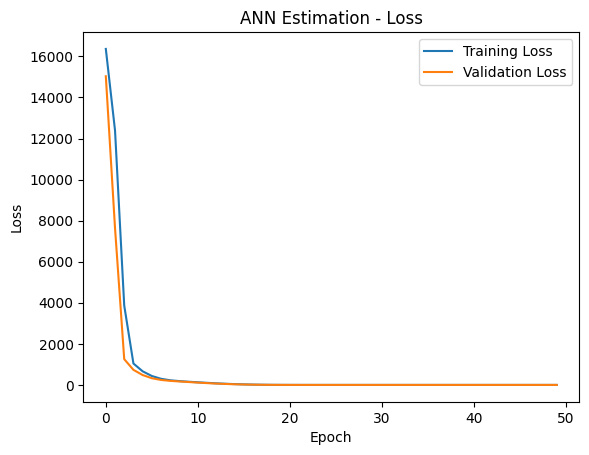

['scaler_estimasi.save']

In [92]:
# 3. Model ANN for Estimation (Total Vehicles)
X_estimation = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']]
y_estimation = df['Total']

# Normalize the features for estimation using MinMaxScaler
scaler_est = MinMaxScaler()
X_estimation = scaler_est.fit_transform(X_estimation)

# Train-test split for estimation
X_train_est, X_test_est, y_train_est, y_test_est = train_test_split(X_estimation, y_estimation, test_size=0.2, random_state=42)

# Create the ANN model for estimation (Total traffic count)
model_est = Sequential()
model_est.add(Dense(64, input_dim=X_train_est.shape[1], activation='relu'))
model_est.add(Dense(32, activation='relu'))
model_est.add(Dense(1))  # Output layer with one value for total vehicle estimation

# Compile and fit the model for estimation
model_est.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam')  # Explicitly using MeanSquaredError
history_est = model_est.fit(X_train_est, y_train_est, epochs=50, batch_size=32, validation_data=(X_test_est, y_test_est))

# Plotting the training history for estimation
plt.plot(history_est.history['loss'], label='Training Loss')
plt.plot(history_est.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('ANN Estimation - Loss')
plt.show()

# Save the estimation model and scaler
model_est.save("model_estimasi.h5")
joblib.dump(scaler_est, "scaler_estimasi.save")

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 14845.8662 - val_loss: 3258.9214
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3558.6343 - val_loss: 3018.8169
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3136.7031 - val_loss: 2799.8035
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3052.5627 - val_loss: 2483.2478
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2552.4373 - val_loss: 2248.8655
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2174.2075 - val_loss: 2100.8647
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2075.6145 - val_loss: 1918.1061
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1843.5753 - val_loss: 1846.4414
Epoch 9/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1838.6959 - val_loss: 1762.0890
Epoch 10/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1684.6238 - val_loss: 1730.4714
Epoch 11/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1593.4370 - val_loss: 1728.9980
Epoch 12/20
75/75

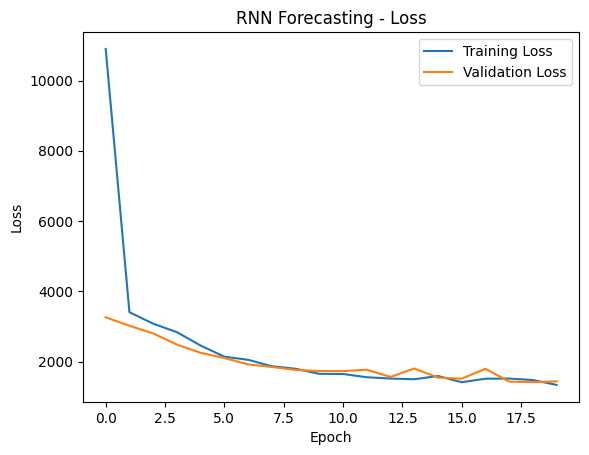

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1420.1686


RNN Test Loss (MSE): 1436.5342


['scaler_rnn.save']

In [93]:
# 4. Model RNN for Estimation (Total Vehicles)
# Prepare data for RNN input
X_rnn = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']]
y_rnn = df['Total']

# Normalize the features for RNN using MinMaxScaler
scaler_rnn = MinMaxScaler()
scaled_data = scaler_rnn.fit_transform(X_rnn)

# Create sequences (X, y) for RNN input
def create_sequences(data, target, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(target[i + window_size])
    return np.array(X), np.array(y)

# Window size (12 timesteps for past 12 data points)
window_size = 12

# Prepare input and target data for RNN
X_rnn, y_rnn = create_sequences(scaled_data, df['Total'].values, window_size)

# Reshape data for RNN (samples, timesteps, features)
X_rnn = X_rnn.reshape((X_rnn.shape[0], X_rnn.shape[1], X_rnn.shape[2]))  # (samples, timesteps, features)

# Train-test split for RNN
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_rnn, y_rnn, test_size=0.2, shuffle=False)

# Build the RNN model for estimation
model_rnn = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(window_size, X_rnn.shape[2])),  # (timesteps, features)
    Dense(1)  # Output layer with one value for total vehicle estimation
])

# Compile the model
model_rnn.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())  # Explicitly using MSE loss

# Train the RNN model
history_rnn = model_rnn.fit(X_train_rnn, y_train_rnn, epochs=20, batch_size=32, validation_data=(X_test_rnn, y_test_rnn))

# Plot training and validation loss
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('RNN Forecasting - Loss')
plt.show()

# Evaluate the RNN model
loss_rnn = model_rnn.evaluate(X_test_rnn, y_test_rnn)
print(f"RNN Test Loss (MSE): {loss_rnn:.4f}")

# Save the RNN model and scaler
model_rnn.save("model_rnn.h5")
joblib.dump(scaler_rnn, "scaler_rnn.save")